<a href="https://colab.research.google.com/github/seymatttass/Plant_Detection/blob/main/inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/AYZEK-Kanarya/dataset/train'
test_path = '/content/drive/MyDrive/AYZEK-Kanarya/dataset/test'
val_path = '/content/drive/MyDrive/AYZEK-Kanarya/dataset/val'

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)
val_data_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
        train_path,
        target_size=(299, 299),
        batch_size=16,
        class_mode='categorical')

Found 1207 images belonging to 4 classes.


In [ ]:
test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical'
)

Found 154 images belonging to 4 classes.


In [ ]:
val_generator = val_data_gen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical'

)

Found 150 images belonging to 4 classes.


In [ ]:
checkpoint = ModelCheckpoint(
    f'/content/drive/MyDrive/muhendislik-tasarimi/GoogleNet/inceptionv3_model_enyenisi.h5',
     monitor='val_accuracy',
     verbose=1,
     save_best_only=True,
     mode = 'max'
)

In [ ]:
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=10,
                          verbose=1,
                          mode = 'max')

In [ ]:
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

model = Sequential()
model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(train_generator.num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 23905060 (91.19 MB)
Trainable params: 23870628 (91.06 MB)
Non-trainable params: 34432 (134.50 KB)
________

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks = [earlystop, checkpoint]
)


Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.7867
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to /content/drive/MyDrive/muhendislik-tasarimi/GoogleNet/inceptionv3_model_enyenisi.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 79s 482ms/step - loss: 0.6625 - accuracy: 0.7867 - val_loss: 3.4867 - val_accuracy: 0.6667
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.8447
Epoch 2: val_accuracy did not improve from 0.66667
75/75 [==============================] - 21s 275ms/step - loss: 0.4568 - accuracy: 0.8447 - val_loss: 130.3251 - val_accuracy: 0.3333
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.3585 - accuracy: 0.8673
Epoch 3: val_accuracy improved from 0.66667 to 0.68056, saving model to /content/drive/MyDrive/muhendislik-tasarimi/GoogleNet/inceptionv3_model_enyenisi.h5
75/75 [==============================] - 28s 378ms/step - loss: 0.3585 - accuracy: 0.8673 - val_loss: 27.8552 - val_accuracy: 0.6806
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.9110
Epoch 4: val_accuracy did not improve from 0.68056
75/75 [==============================] - 21s 279ms/step - los

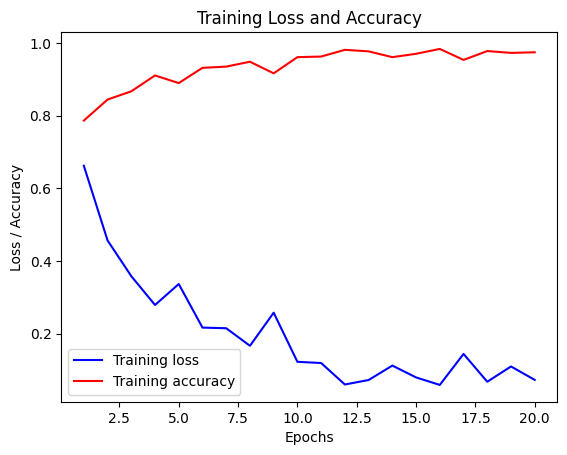

In [ ]:
import matplotlib.pyplot as plt
train_loss = result.history['loss']
train_accuracy = result.history['accuracy']

# train loss ve train accuracy görselleştirilmesi
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



10/10 [==============================] - 5s 468ms/step - loss: 0.1328 - accuracy: 0.9545
Test Loss: 0.1327933818101883
Test Accuracy: 0.9545454382896423


In [ ]:
#model ile tahmin (test verileriyle)
predictions = model.predict(test_generator)

# test verileri ve tahmin edilen değerler arasındaki karşılaştırma
num_samples_to_visualize = 10
test_labels = []  # Gerçek değerleri tutan boş liste
predicted_labels = []  # Tahmin edilen değerleri tutan boş liste

# Test verilerinden örnekleri al
for i, (_, labels) in enumerate(test_generator):
    test_labels.extend(labels.argmax(axis=1))  # Gerçek etiketleri al
    predicted_labels.extend(predictions.argmax(axis=1))  # Tahmin edilen etiketleri al
    if i == num_samples_to_visualize - 1:
        break

# Sonuçları görselleştir
plt.figure(figsize=(12, 8))
for i in range(num_samples_to_visualize):
    plt.subplot(5, 2, i + 1)
    plt.imshow(test_generator[i][0][0])  # Test resmini göster
    plt.title(f'Real: {test_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
